In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  #
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint

In [4]:
## First reduce the data before starting the project
stocks= pd.read_csv('stocks_df.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
max_date = stocks['Date'].max()
median_date = stocks['Date'].median()
min_date = stocks['Date'].min()

##print(f"max date - {max_date}")
##print(f"median date - {max_date}")
##print(f"min date - {min_date}")

## lets filter out old data 
stocks = stocks[(stocks['Date'] >= '2020-06-01') & (stocks['Date'] <= '2022-01-11')]
stocks = stocks.reset_index(drop=True)
interested_Stocks = ["INFY","TCS"]
stocks = stocks[stocks['Stock'].isin(interested_Stocks)]
stocks = stocks.reset_index(drop=True)

          Date Stock     Open     High      Low    Close    Volume  Change Pct    Return
0   2020-06-01  INFY   698.75   706.65   691.50   699.55  12276649        1.24       NaN
1   2020-06-02  INFY   700.50   711.65   697.55   708.10   7059409        1.22  0.012222
2   2020-06-03  INFY   710.70   711.90   696.00   701.55  11378568       -0.93 -0.009250
3   2020-06-04  INFY   702.00   709.45   697.50   707.75  10783594        0.88  0.008838
4   2020-06-05  INFY   707.00   711.70   700.60   703.55   7718943       -0.59 -0.005934
..         ...   ...      ...      ...      ...      ...       ...         ...       ...
805 2022-01-05   TCS  3865.00  3870.00  3812.40  3860.95   1733031       -0.61 -0.006127
806 2022-01-06   TCS  3812.00  3835.00  3772.00  3807.45   1810293       -1.39 -0.013857
807 2022-01-07   TCS  3820.00  3864.90  3796.40  3853.50   2460591        1.21  0.012095
808 2022-01-10   TCS  3978.00  3978.00  3861.00  3879.85   3937092        0.68  0.006838
809 2022-01-11   TCS 

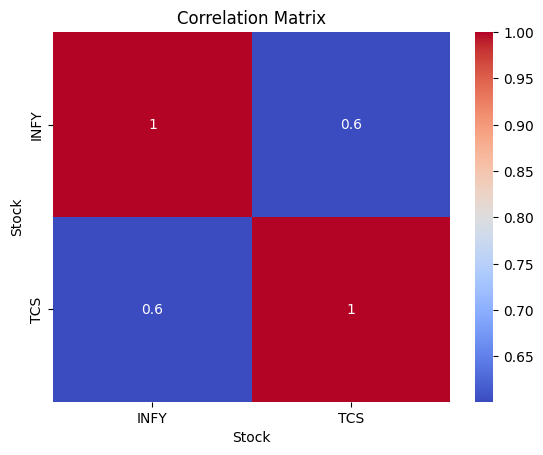

P-Value: 0.0


In [15]:
# Calculate daily returns

stocks['Return'] = stocks.groupby('Stock')['Close'].pct_change()
print(stocks)

# Pivot to wide format
returns_pivot = stocks.pivot(index='Date', columns='Stock', values='Return')
print(returns_pivot)

correlation_matrix = returns_pivot.corr()
print(correlation_matrix)


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

from statsmodels.tsa.stattools import coint

score, p_value, _ = coint(returns_pivot['TCS'].dropna(), returns_pivot['INFY'].dropna())
print(f'P-Value: {p_value}')


In [16]:
returns_pivot

Stock,INFY,TCS
Date,,
2020-06-01,NaN,NaN
2020-06-02,0.012222,0.000929
2020-06-03,-0.009250,-0.000488
2020-06-04,0.008838,0.022188
2020-06-05,-0.005934,-0.020702
...,...,...
2022-01-05,-0.028697,-0.006127
2022-01-06,-0.014556,-0.013857
2022-01-07,-0.001925,0.012095
